In [ ]:
%tensorflow_version 2.x

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# **Time-Series Data**

In [ ]:
ng=pd.read_csv('/content/Natural_Gas.csv')
ng.head()

,Date,Price,Open,High,Low,Vol.(in K ),Change %
0,"Jun 16, 2022",7.67,7.57,7.67,7.51,NaN,0.03
1,"Jun 15, 2022",7.42,7.27,7.70,7.20,123.59,0.03
2,"Jun 14, 2022",7.19,8.69,8.89,7.01,273.72,-0.16
3,"Jun 13, 2022",8.61,8.92,8.95,8.38,167.56,-0.03
4,"Jun 10, 2022",8.85,9.00,9.15,8.62,134.61,-0.01


## **Exploratory Data Analysis**

In [ ]:
ng.describe()

,Price,Open,High,Low,Vol.(in K ),Change %
count,2734.000000,2734.000000,2734.000000,2734.000000,2627.000000,2734.000000
mean,3.176342,3.178040,3.245688,3.111752,136.397214,0.000830
std,1.062301,1.060537,1.102369,1.022979,60.982998,0.031568
min,1.480000,1.440000,1.570000,1.430000,1.470000,-0.170000
25%,2.580000,2.590000,2.630000,2.540000,99.790000,-0.020000
50%,2.910000,2.910000,2.960000,2.870000,134.950000,0.000000
75%,3.650000,3.650000,3.720000,3.590000,170.210000,0.020000
max,9.320000,9.360000,9.660000,9.200000,459.200000,0.220000


In [ ]:
# Feature data types
ng.dtypes

Date            object
Price          float64
Open           float64
High           float64
Low            float64
Vol.(in K )    float64
Change %       float64
dtype: object

In [ ]:
ng['Vol.(in K )']=ng['Vol.(in K )'].fillna(0)
ng.head()

,Date,Price,Open,High,Low,Vol.(in K ),Change %
0,"Jun 16, 2022",7.67,7.57,7.67,7.51,0.00,0.03
1,"Jun 15, 2022",7.42,7.27,7.70,7.20,123.59,0.03
2,"Jun 14, 2022",7.19,8.69,8.89,7.01,273.72,-0.16
3,"Jun 13, 2022",8.61,8.92,8.95,8.38,167.56,-0.03
4,"Jun 10, 2022",8.85,9.00,9.15,8.62,134.61,-0.01


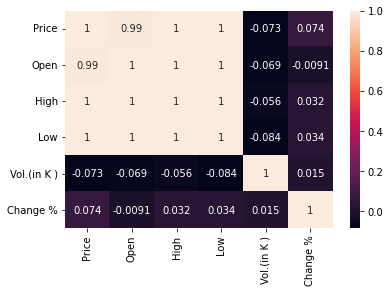

In [ ]:
# Corellation Plot
sns.heatmap(ng.corr(),annot=True)

## **Fitting The Model**

In [ ]:
price=ng['Price']

In [ ]:
def df_to_X_y(data, window_size):
  data_np = data.to_numpy()
  X = []
  y = []
  for i in range(len(data_np)-window_size):
    row = [[a] for a in data_np[i:i+window_size]]
    X.append(row)
    label = data_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
x,y=df_to_X_y(price,10)

In [ ]:
x_train,y_train=x[1800:2724],y[1800:2724]
x_val,y_val=x[800:1800],y[800:1800]
x_test,y_test=x[0:800],y[0:800]

### **LSTM**

In [ ]:
# Building the model
model1=Sequential()
model1.add(InputLayer((10,1)))
model1.add(LSTM(64))
model1.add(Dense(10,'relu'))
model1.add(Dense(1,'linear'))

model1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                16896     
                                                                 
 dense_32 (Dense)            (None, 10)                650       
                                                                 
 dense_33 (Dense)            (None, 1)                 11        
                                                                 
Total params: 17,557
Trainable params: 17,557
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Saving the best model and evaluating the best model of them all
checkPoint1=ModelCheckpoint('model1/',save_best_only=True)
model1.compile(optimizer=Adam(learning_rate=0.01),loss=MeanSquaredError(),metrics=[RootMeanSquaredError()])

In [ ]:
# Training the model
model1.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=20,callbacks=[checkPoint1])

Epoch 1/20
24/29 [=======================>......] - ETA: 0s - loss: 1.3145 - root_mean_squared_error: 1.1465

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


29/29 [==============================] - 8s 205ms/step - loss: 1.1731 - root_mean_squared_error: 1.0831 - val_loss: 0.2726 - val_root_mean_squared_error: 0.5221
Epoch 2/20
23/29 [======================>.......] - ETA: 0s - loss: 0.3792 - root_mean_squared_error: 0.6158

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


29/29 [==============================] - 4s 160ms/step - loss: 0.3385 - root_mean_squared_error: 0.5818 - val_loss: 0.0541 - val_root_mean_squared_error: 0.2325
Epoch 3/20
23/29 [======================>.......] - ETA: 0s - loss: 0.0764 - root_mean_squared_error: 0.2764

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


29/29 [==============================] - 4s 158ms/step - loss: 0.0671 - root_mean_squared_error: 0.2590 - val_loss: 0.0388 - val_root_mean_squared_error: 0.1970
Epoch 4/20
24/29 [=======================>......] - ETA: 0s - loss: 0.0314 - root_mean_squared_error: 0.1773

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


29/29 [==============================] - 4s 158ms/step - loss: 0.0297 - root_mean_squared_error: 0.1722 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1369
Epoch 5/20
23/29 [======================>.......] - ETA: 0s - loss: 0.0226 - root_mean_squared_error: 0.1503

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


29/29 [==============================] - 5s 194ms/step - loss: 0.0231 - root_mean_squared_error: 0.1518 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1199
Epoch 6/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0323 - root_mean_squared_error: 0.1796 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1234
Epoch 7/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0224 - root_mean_squared_error: 0.1497 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1302
Epoch 8/20
24/29 [=======================>......] - ETA: 0s - loss: 0.0174 - root_mean_squared_error: 0.1318

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


29/29 [==============================] - 4s 158ms/step - loss: 0.0176 - root_mean_squared_error: 0.1325 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1183
Epoch 9/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0181 - root_mean_squared_error: 0.1345 - val_loss: 0.0411 - val_root_mean_squared_error: 0.2028
Epoch 10/20
24/29 [=======================>......] - ETA: 0s - loss: 0.0176 - root_mean_squared_error: 0.1325

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


29/29 [==============================] - 4s 155ms/step - loss: 0.0170 - root_mean_squared_error: 0.1305 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1016
Epoch 11/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0147 - root_mean_squared_error: 0.1214 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1135
Epoch 12/20
23/29 [======================>.......] - ETA: 0s - loss: 0.0145 - root_mean_squared_error: 0.1202

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


29/29 [==============================] - 5s 188ms/step - loss: 0.0152 - root_mean_squared_error: 0.1231 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1007
Epoch 13/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0150 - root_mean_squared_error: 0.1223 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1167
Epoch 14/20
25/29 [========================>.....] - ETA: 0s - loss: 0.0138 - root_mean_squared_error: 0.1174

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


29/29 [==============================] - 4s 158ms/step - loss: 0.0132 - root_mean_squared_error: 0.1151 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0970
Epoch 15/20
23/29 [======================>.......] - ETA: 0s - loss: 0.0141 - root_mean_squared_error: 0.1187

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


29/29 [==============================] - 4s 158ms/step - loss: 0.0135 - root_mean_squared_error: 0.1161 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0954
Epoch 16/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0160 - root_mean_squared_error: 0.1266 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0988
Epoch 17/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0148 - root_mean_squared_error: 0.1215 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0960
Epoch 18/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0133 - root_mean_squared_error: 0.1152 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0985
Epoch 19/20
25/29 [========================>.....] - ETA: 0s - loss: 0.0129 - root_mean_squared_error: 0.1137

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


29/29 [==============================] - 4s 155ms/step - loss: 0.0124 - root_mean_squared_error: 0.1114 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0945
Epoch 20/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0152 - root_mean_squared_error: 0.1235 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1040


In [ ]:
model1=load_model('model1/')

In [ ]:
predictions1=model1.predict(x_test).flatten()
pred_df1=pd.DataFrame(data={'Predictions':predictions1,'Actual':y_test})
pred_df1.head()

,Predictions,Actual
0,7.131179,8.49
1,7.094980,8.70
2,7.155614,8.15
3,6.994233,8.69
4,7.135355,8.82


In [ ]:
model1_mse=mse(y_test,predictions1)
print('LSTM MSE:',str(model1_mse))

LSTM MSE: 0.07811538094692025


Text(0.5, 1.0, 'LSTM Results')

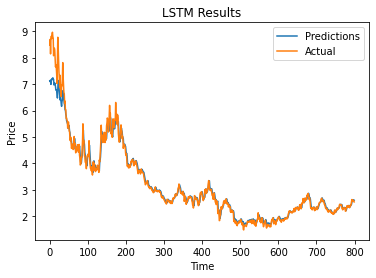

In [ ]:
plt.plot(pred_df1['Predictions'],label='Predictions')
plt.plot(pred_df1['Actual'],label='Actual')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.title('LSTM Results')

### **GRU**

In [ ]:
model2=Sequential()
model2.add(InputLayer((10,1)))
model2.add(GRU(64))
model2.add(Dense(10,'relu'))
model2.add(Dense(1,'linear'))

model2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 64)                12864     
                                                                 
 dense_34 (Dense)            (None, 10)                650       
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 13,525
Trainable params: 13,525
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkPoint2=ModelCheckpoint('model2/',save_best_only=True)
model2.compile(optimizer=Adam(learning_rate=0.01),loss=MeanSquaredError(),metrics=[RootMeanSquaredError()])
model2.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=20,callbacks=[checkPoint2])

Epoch 1/20
24/29 [=======================>......] - ETA: 0s - loss: 1.7250 - root_mean_squared_error: 1.3134

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


29/29 [==============================] - 6s 155ms/step - loss: 1.4897 - root_mean_squared_error: 1.2205 - val_loss: 0.4502 - val_root_mean_squared_error: 0.6710
Epoch 2/20
24/29 [=======================>......] - ETA: 0s - loss: 0.1401 - root_mean_squared_error: 0.3743

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


29/29 [==============================] - 4s 138ms/step - loss: 0.1204 - root_mean_squared_error: 0.3470 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1126
Epoch 3/20
25/29 [========================>.....] - ETA: 0s - loss: 0.0217 - root_mean_squared_error: 0.1472

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


29/29 [==============================] - 5s 172ms/step - loss: 0.0208 - root_mean_squared_error: 0.1444 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0980
Epoch 4/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0149 - root_mean_squared_error: 0.1221 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1012
Epoch 5/20
24/29 [=======================>......] - ETA: 0s - loss: 0.0123 - root_mean_squared_error: 0.1110

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


29/29 [==============================] - 4s 140ms/step - loss: 0.0133 - root_mean_squared_error: 0.1153 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0937
Epoch 6/20
23/29 [======================>.......] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.1150

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


29/29 [==============================] - 4s 139ms/step - loss: 0.0123 - root_mean_squared_error: 0.1110 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0928
Epoch 7/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0137 - root_mean_squared_error: 0.1171 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0975
Epoch 8/20
25/29 [========================>.....] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1125

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


29/29 [==============================] - 4s 138ms/step - loss: 0.0125 - root_mean_squared_error: 0.1117 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0904
Epoch 9/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0119 - root_mean_squared_error: 0.1089 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1064
Epoch 10/20
25/29 [========================>.....] - ETA: 0s - loss: 0.0133 - root_mean_squared_error: 0.1152

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


29/29 [==============================] - 5s 173ms/step - loss: 0.0129 - root_mean_squared_error: 0.1136 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0900
Epoch 11/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0125 - root_mean_squared_error: 0.1118 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0977
Epoch 12/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0163 - root_mean_squared_error: 0.1277 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0953
Epoch 13/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0148 - root_mean_squared_error: 0.1218 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1120
Epoch 14/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0134 - root_mean_squared_error: 0.1156 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0997
Epoch 15/20
29/29 [==============================] - 0s 9ms/step - loss: 0.0122 - root_mean_squared_error: 0.1106 - val_loss: 0.0081 - val_root_mean_sq

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


29/29 [==============================] - 4s 141ms/step - loss: 0.0138 - root_mean_squared_error: 0.1173 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0896
Epoch 17/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0114 - root_mean_squared_error: 0.1067 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0899
Epoch 18/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0123 - root_mean_squared_error: 0.1109 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1234
Epoch 19/20
29/29 [==============================] - 0s 13ms/step - loss: 0.0153 - root_mean_squared_error: 0.1235 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0902
Epoch 20/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0135 - root_mean_squared_error: 0.1162 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0958


In [ ]:
model2=load_model('model2/')
predict2=model2.predict(x_test).flatten()
pred_df2=pd.DataFrame(data={'Predictions':predict2,'Actual':y_test})
pred_df2.head()

,Predictions,Actual
0,6.697415,8.49
1,6.678788,8.70
2,6.718437,8.15
3,6.622390,8.69
4,6.720471,8.82


In [ ]:
model2_mse=mse(y_test,predict2)
print('GRU MSE:  ',str(model2_mse))

GRU MSE:   0.11591719637648058


Text(0.5, 1.0, 'GRU Results')

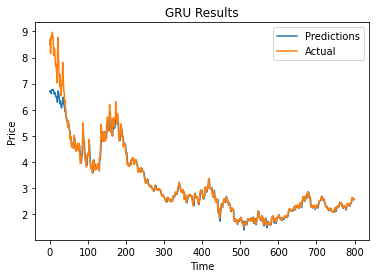

In [ ]:
plt.plot(pred_df2['Predictions'],label='Predictions')
plt.plot(pred_df2['Actual'],label='Actual')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.title('GRU Results')

### **Simple RNN**

In [ ]:
model3=Sequential()
model3.add(InputLayer((10,1)))
model3.add(SimpleRNN(64))
model3.add(Dense(10,'relu'))
model3.add(Dense(1,'linear'))

model3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_36 (Dense)            (None, 10)                650       
                                                                 
 dense_37 (Dense)            (None, 1)                 11        
                                                                 
Total params: 4,885
Trainable params: 4,885
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkPoint3=ModelCheckpoint('model3/',save_best_only=True)
model3.compile(optimizer=Adam(learning_rate=0.01),loss=MeanSquaredError(),metrics=[RootMeanSquaredError()])
model3.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=20,callbacks=[checkPoint3])

Epoch 1/20
17/29 [================>.............] - ETA: 0s - loss: 1.7132 - root_mean_squared_error: 1.3089 INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


29/29 [==============================] - 3s 68ms/step - loss: 1.2206 - root_mean_squared_error: 1.1048 - val_loss: 0.2564 - val_root_mean_squared_error: 0.5064
Epoch 2/20
28/29 [===========================>..] - ETA: 0s - loss: 0.1555 - root_mean_squared_error: 0.3943INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


29/29 [==============================] - 3s 92ms/step - loss: 0.1520 - root_mean_squared_error: 0.3898 - val_loss: 0.0186 - val_root_mean_squared_error: 0.1365
Epoch 3/20
29/29 [==============================] - 0s 7ms/step - loss: 0.0200 - root_mean_squared_error: 0.1415 - val_loss: 0.0263 - val_root_mean_squared_error: 0.1621
Epoch 4/20
16/29 [===============>..............] - ETA: 0s - loss: 0.0184 - root_mean_squared_error: 0.1357INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


29/29 [==============================] - 2s 63ms/step - loss: 0.0261 - root_mean_squared_error: 0.1617 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1172
Epoch 5/20
29/29 [==============================] - 0s 6ms/step - loss: 0.0205 - root_mean_squared_error: 0.1432 - val_loss: 0.0253 - val_root_mean_squared_error: 0.1590
Epoch 6/20
29/29 [==============================] - 0s 6ms/step - loss: 0.0187 - root_mean_squared_error: 0.1368 - val_loss: 0.0514 - val_root_mean_squared_error: 0.2266
Epoch 7/20
29/29 [==============================] - 0s 7ms/step - loss: 0.0261 - root_mean_squared_error: 0.1616 - val_loss: 0.0430 - val_root_mean_squared_error: 0.2074
Epoch 8/20
29/29 [==============================] - 0s 7ms/step - loss: 0.0188 - root_mean_squared_error: 0.1372 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1384
Epoch 9/20
29/29 [==============================] - 0s 7ms/step - loss: 0.0193 - root_mean_squared_error: 0.1391 - val_loss: 0.0186 - val_root_mean_squared_erro

INFO:tensorflow:Assets written to: model3/assets


29/29 [==============================] - 2s 63ms/step - loss: 0.0180 - root_mean_squared_error: 0.1342 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0938
Epoch 11/20
27/29 [==========================>...] - ETA: 0s - loss: 0.0139 - root_mean_squared_error: 0.1180INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


29/29 [==============================] - 2s 63ms/step - loss: 0.0137 - root_mean_squared_error: 0.1169 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0904
Epoch 12/20
29/29 [==============================] - 0s 6ms/step - loss: 0.0127 - root_mean_squared_error: 0.1125 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1102
Epoch 13/20
29/29 [==============================] - 0s 6ms/step - loss: 0.0171 - root_mean_squared_error: 0.1307 - val_loss: 0.0245 - val_root_mean_squared_error: 0.1567
Epoch 14/20
29/29 [==============================] - 0s 6ms/step - loss: 0.0135 - root_mean_squared_error: 0.1161 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1250
Epoch 15/20
29/29 [==============================] - 0s 6ms/step - loss: 0.0191 - root_mean_squared_error: 0.1382 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0964
Epoch 16/20
29/29 [==============================] - 0s 6ms/step - loss: 0.0142 - root_mean_squared_error: 0.1191 - val_loss: 0.0086 - val_root_mean_squared

In [ ]:
model3=load_model('model3/')
predict3=model3.predict(x_test).flatten()
pred_df3=pd.DataFrame(data={'Predictions':predict3,'Actual':y_test})
pred_df3.head()

,Predictions,Actual
0,6.222510,8.49
1,6.206355,8.70
2,6.214241,8.15
3,6.187701,8.69
4,6.209029,8.82


In [ ]:
model3_mse=mse(y_test,predict3)
print('Simple RNN MSE:  ',str(model3_mse))

Simple RNN MSE:   0.1777058205095581


Text(0.5, 1.0, 'Simple RNN Results')

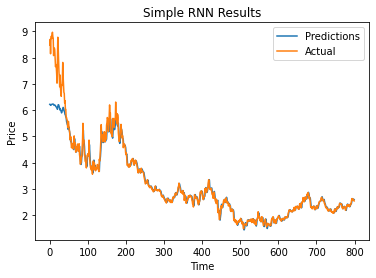

In [ ]:
plt.plot(pred_df3['Predictions'],label='Predictions')
plt.plot(pred_df3['Actual'],label='Actual')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.title('Simple RNN Results')